In [ ]:
######################### SVM #################################3

In [14]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
import random
from  sklearn.model_selection import train_test_split
from sklearn import datasets, metrics, model_selection, svm
from sklearn.svm import SVC
import time



In [15]:


dir="/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data7/"

data=[]

categories =['down', 'up']
for category in categories:
    path=os.path.join(dir,category)
    label = categories.index(category)
    
    for img in os.listdir(path):
        imgpath=os.path.join(path,img)
        pet_img=cv2.imread(imgpath,0)
        try:
            pet_img=cv2.resize(pet_img,(50,50))
            image=np.array(pet_img).flatten()
        
            data.append([image,label])
        except Exception as e:
            pass
        
print(len(data))
        


3787


In [3]:
pick_in=open('/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data7/data.pickle','wb')
pickle.dump(data,pick_in)
pick_in.close()

In [4]:
pick_in=open('/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data7/data.pickle','rb')
data=pickle.load(pick_in)
pick_in.close()

In [5]:
random.shuffle(data)

features=[]
labels=[]

for feature, label in data:
    features.append(feature)
    labels.append(label)

In [38]:
xtrain,xtest,ytrain,ytest = train_test_split(features,labels,test_size=0.25)

model =SVC(C=1,gamma='auto',kernel='poly',degree=8)


start = time.time()
print("Start")
model.fit(xtrain,ytrain)
pick=open('/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data7/modelsvc06MAR22.save','wb')
pickle.dump(model,pick)
pick.close()
end = time.time()
print("Elapsed time ", end - start)

Start
Elapsed time  10.138581275939941


Accuraccy:  0.9081309398099261
Prediction is:  down


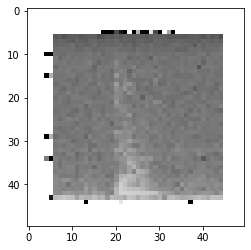

In [39]:
prediction=model.predict(xtest)
accuracy = model.score(xtest,ytest)
print("Accuraccy: ",accuracy)
print('Prediction is: ',categories[prediction[0]])

mypet=xtest[0].reshape(50,50)
plt.imshow(mypet,cmap='gray')
plt.show()

/home/german/Escritorio/ambiente/cnn/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


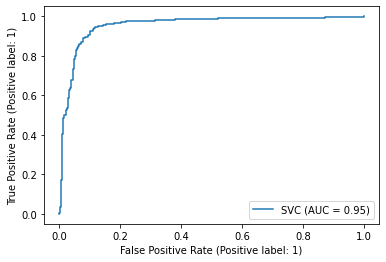

In [40]:
metrics.plot_roc_curve(model, xtest, ytest) 